<a href="https://colab.research.google.com/github/Yanshuprii/Python_Fundamentals_Assignment/blob/main/Projectpython0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Welcome to the Gym Fitness Tracker!
Loading data from 'dataforproject.txt'...
Data loaded successfully from 'dataforproject.txt'!
Preprocessing data...
Displaying data trends...


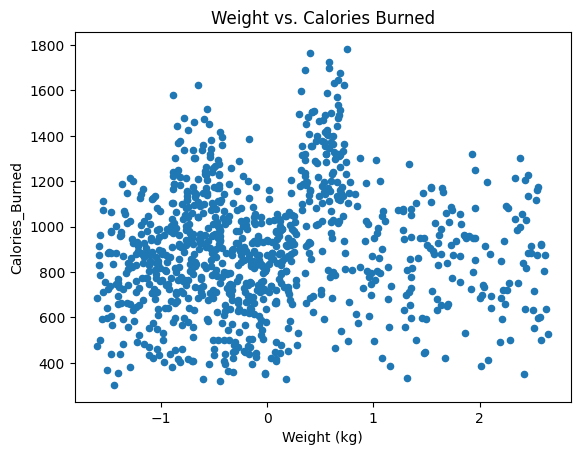

Training the model...
Model trained! Mean Squared Error: 13861.96, R-squared: 0.83
Please enter your details:
Weight (in kg): 62
Exercise duration (hours): 3
Maximum Bpm: 121
Types of Exercises:
1.Yoga
2.HIIT
3.Cardio
4.Strength
Type of exercise: Yoga
Water intake (in liters): 3
Workout frequency (days/week): 5
Predicting calories burned...
Estimated Calories Burned: 2169.57 kcal


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

def preprocess_data(df):
    print("Preprocessing data...")


    exercise_map = {'Yoga': 1, 'HIIT': 2, 'Cardio': 3, 'Strength': 4}
    df['Workout_Type'] = df['Workout_Type'].astype(str).str.lower().map(exercise_map).fillna(0)

    scaler = StandardScaler()
    selected_columns = ['Weight (kg)', 'Session_Duration (hours)', 'Max_BPM', 'Workout_Type','Water_Intake (liters)','Workout_Frequency (days/week)']
    df[selected_columns] = scaler.fit_transform(df[selected_columns])

    return df, scaler

def get_user_data(scaler):
    print("Please enter your details:")

    weight = float(input("Weight (in kg): "))
    duration = float(input("Exercise duration (hours): "))
    max_bpm = int(input("Maximum Bpm: "))
    print("Types of Exercises:")
    print("1.Yoga")
    print("2.HIIT")
    print("3.Cardio")
    print("4.Strength")
    exercise_type = input("Type of exercise: ").strip().lower()
    water_intake = float(input("Water intake (in liters): "))
    workout_frequency = int(input("Workout frequency (days/week): "))

    exercise_map = {'Yoga': 1, 'HIIT': 2, 'Cardio': 3, 'Strength': 4}
    workout_type = exercise_map.get(exercise_type, 0)

    user_data = [[weight, duration, max_bpm, workout_type,water_intake,workout_frequency]]
    user_data_scaled = scaler.transform(user_data)

    return user_data_scaled[0]

def load_dataset():
    print("Loading data from 'dataforproject.txt'...")
    try:
        df = pd.read_csv("dataforproject.txt")
        print("Data loaded successfully from 'dataforproject.txt'!")
        return df
    except FileNotFoundError:
        print("File 'dataforproject.txt' not found. Creating a new dataset...")
        df = pd.DataFrame(columns=['Weight (kg)', 'Session_Duration (hours)', 'Max_BPM', 'Workout_Type', 'Calories_Burned','Water_Intake (liters)','Workout_Frequency (days/week)'])
        return df

def visualize_data(df):
    print("Displaying data trends...")
    df.plot.scatter(x="Weight (kg)", y="Calories_Burned", title="Weight vs. Calories Burned")
    plt.show()

def train_model(df):
    print("Training the model...")
    X = df[['Weight (kg)', 'Session_Duration (hours)', 'Max_BPM', 'Workout_Type','Water_Intake (liters)','Workout_Frequency (days/week)']]
    y = df['Calories_Burned']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"Model trained! Mean Squared Error: {mse:.2f}, R-squared: {r2:.2f}")
    return model

def predict_calories(model, user_data):
    print("Predicting calories burned...")
    predicted_calories = model.predict([user_data])
    print(f"Estimated Calories Burned: {predicted_calories[0]:.2f} kcal")

def main():
    print("Welcome to the Gym Fitness Tracker!")
    dataset = load_dataset()

    if not dataset.empty:
        exercise_map = {'Yoga': 1, 'HIIT': 2, 'Cardio': 3, 'Strength': 4}
        dataset['Workout_Type'] = dataset['Workout_Type'].str.lower().map(exercise_map).fillna(0)

    if dataset.empty:
        print("No data available. Please provide your details to create the first dataset entry.")
        user_data = get_user_data(None)
        dataset.loc[len(dataset)] = user_data + [0]
        dataset.to_csv('dataforproject.txt', index=False)

    dataset, scaler = preprocess_data(dataset)
    visualize_data(dataset)
    model = train_model(dataset)

    user_data = get_user_data(scaler)
    predict_calories(model, user_data)

if __name__ == "__main__":
    main()



